# Approach 3:

## LSTM Model Weather Prediction

Dataset = Weather dataset 

Data Preprocessing = Relavent features extraction and data scaling

Data Sequencing = Create sequences of 5 days input -> 6th day output input_size(5, 8)

Model Training = LSTM model Training

Model Prediction Output = Model Evaluation

Model Result Comparison = Actual vs Predicted Weather data

## MLP with LSTM Predicted Weather

Dataset = Flood status 2 consecutive days + Elevation + 5 days weather data

Data Cleaning = Balancing Flood status

LSTM Model = Used LSTM model for 6th day weather prediction

New_dataset = Flood status 2 consecutive days + Elevation + 5th day weather data + 6th day predicted weather data

Data Visualization = Visualizing Features corelation and balcanced data

Model training = MLP model training

Model Evaluation = Model training Loss and training accuracy

Model Prediction = Comparison prediction vs ground truth

## LSTM Weather Prediction

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [3]:
# This file contains cell wise Elevation data
weather_data = pd.read_csv('D:\IIT_Work\LSTM-470img-weather.csv', parse_dates=["datetime"], dayfirst=False)
weather_data["datetime"] = weather_data["datetime"].dt.strftime("%m-%d-%Y")  # Convert format to match merged_data
# weather_data.head(10)

weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data = weather_data.sort_values('datetime')

In [4]:
# Selecting the relevant features
features = ['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'windgust', 'sealevelpressure', 'cloudcover']
weather_data = weather_data[features]

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weather_data)

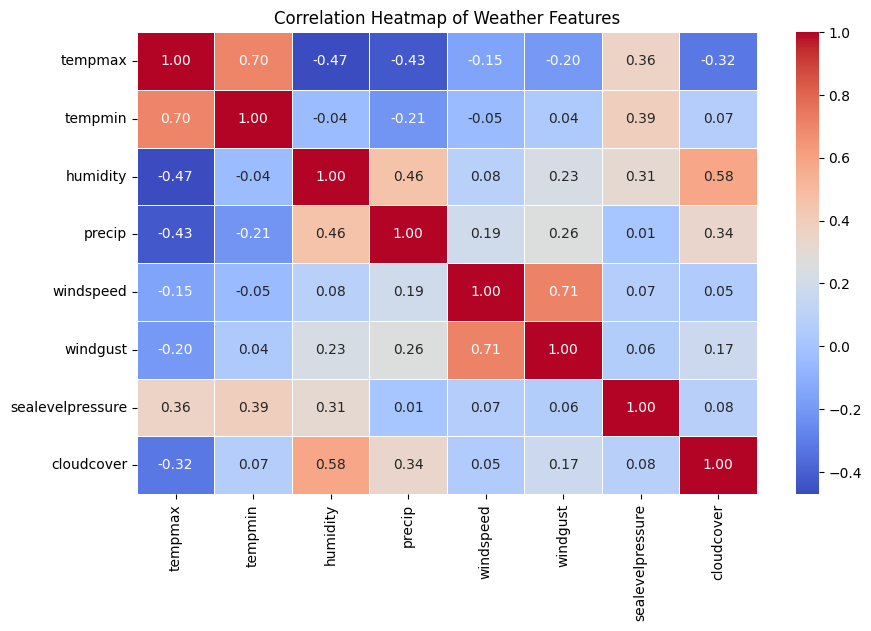

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = weather_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Weather Features")
plt.savefig("plot_weather_heat_maps.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [5]:
# Create sequences of 5 days input -> 6th day output
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])  # 6th day target
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# Split into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(5, 8)),
    LSTM(256, activation='relu'),
    Dense(32, activation='relu'),  # Extra Dense layer for better feature extraction
    Dense(8)  # Predict all 8 features
])


# Define the optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)


D:\IIT_Work\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2188 - mae: 0.3408 - val_loss: 0.0127 - val_mae: 0.0759
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mae: 0.0559 - val_loss: 0.0090 - val_mae: 0.0633
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mae: 0.0446 - val_loss: 0.0077 - val_mae: 0.0578
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mae: 0.0413 - val_loss: 0.0073 - val_mae: 0.0552
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mae: 0.0388 - val_loss: 0.0069 - val_mae: 0.0539
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mae: 0.0365 - val_loss: 0.0064 - val_mae: 0.0521
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - mae: 0.0347 - val_loss: 0.0067 - val_mae: 0.0561
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032 - mae: 0.0342 - val_loss: 0.0058 - val_mae: 0.0487
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms

In [7]:
# Evaluate model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Compare actual vs predicted
comparison = pd.DataFrame({"Actual": y_test_actual.flatten(), "Predicted": predictions.flatten()})
print(comparison.head())

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mae: 0.0272     
Test Loss: 0.003271648194640875, Test MAE: 0.028957396745681763
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
   Actual  Predicted
0    32.0  31.450905
1    23.4  23.598858
2    83.1  85.155174
3    12.5  12.821610
4    13.0  13.773799


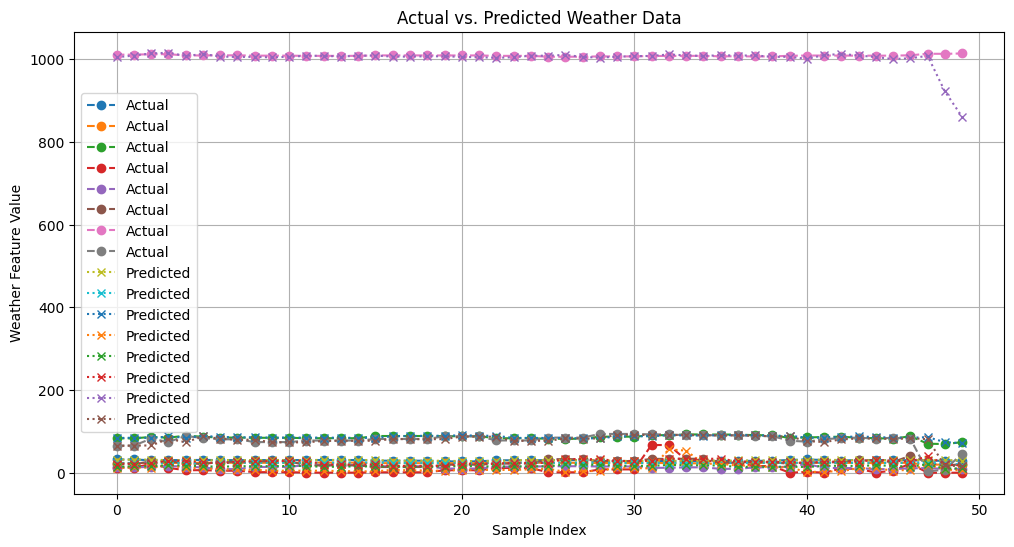

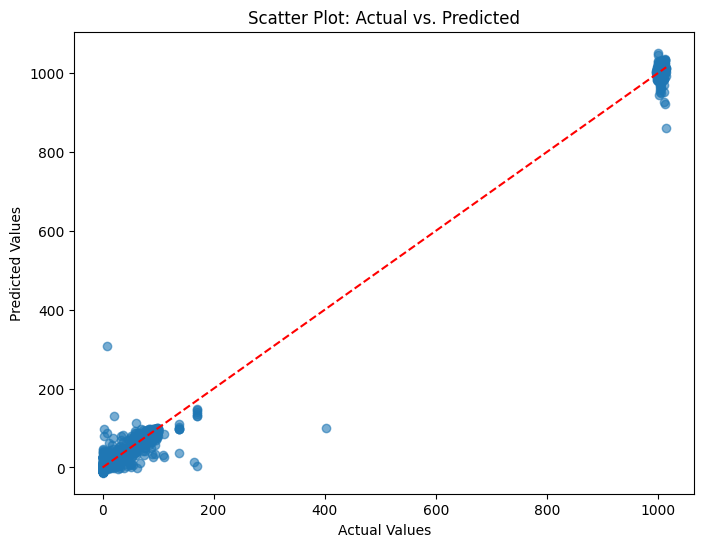

In [11]:
# Plot Actual vs. Predicted for first 50 samples
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:50], label="Actual", marker='o', linestyle='dashed')
plt.plot(predictions[:50], label="Predicted", marker='x', linestyle='dotted')
plt.xlabel("Sample Index")
plt.ylabel("Weather Feature Value")
plt.title("Actual vs. Predicted Weather Data")
plt.legend()
plt.grid()
plt.show()

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, predictions, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Actual vs. Predicted")
plt.show()


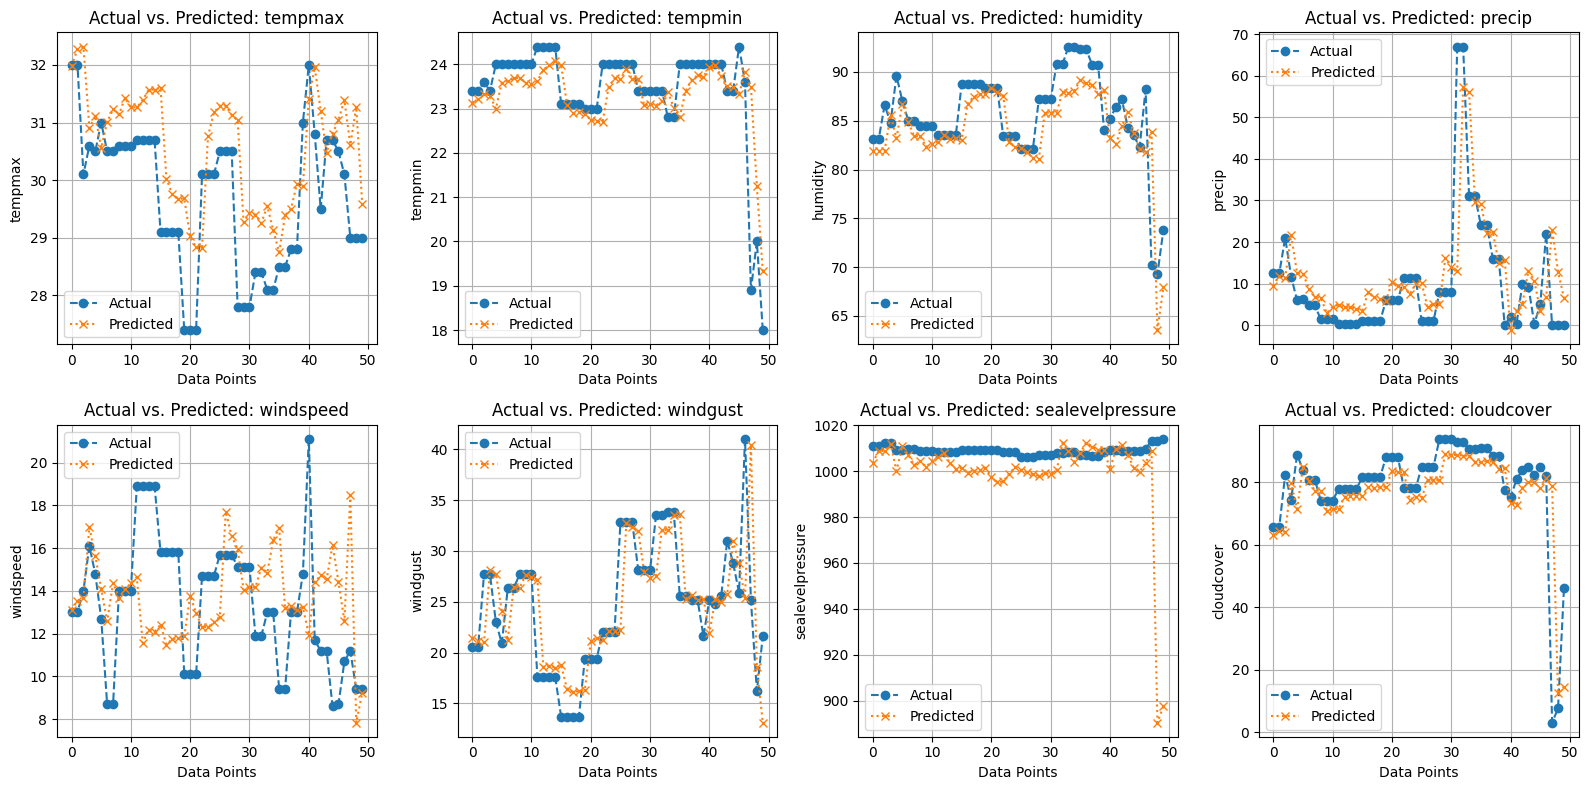

Plot saved as D:\IIT_Work\actual_vs_predicted_weather.pdf


In [18]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Define the PDF file name (use raw string to avoid path issues)
pdf_filename = r"D:\IIT_Work\actual_vs_predicted_weather.pdf"

# Create a PDF file to save the plots
with PdfPages(pdf_filename) as pdf:
    plt.figure(figsize=(16, 8))

    for i, feature in enumerate(features):
        plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
        plt.plot(y_test_actual[:, i][:50], label="Actual", marker='o', linestyle='dashed')
        plt.plot(predictions[:, i][:50], label="Predicted", marker='x', linestyle='dotted')
        plt.xlabel("Data Points")
        plt.ylabel(feature)
        plt.title(f"Actual vs. Predicted: {feature}")
        plt.legend()
        plt.grid()

    plt.tight_layout()
    pdf.savefig()  # Save the figure to the PDF
    plt.show()
    plt.close()  # Close the figure to free memory
    

print(f"Plot saved as {pdf_filename}")


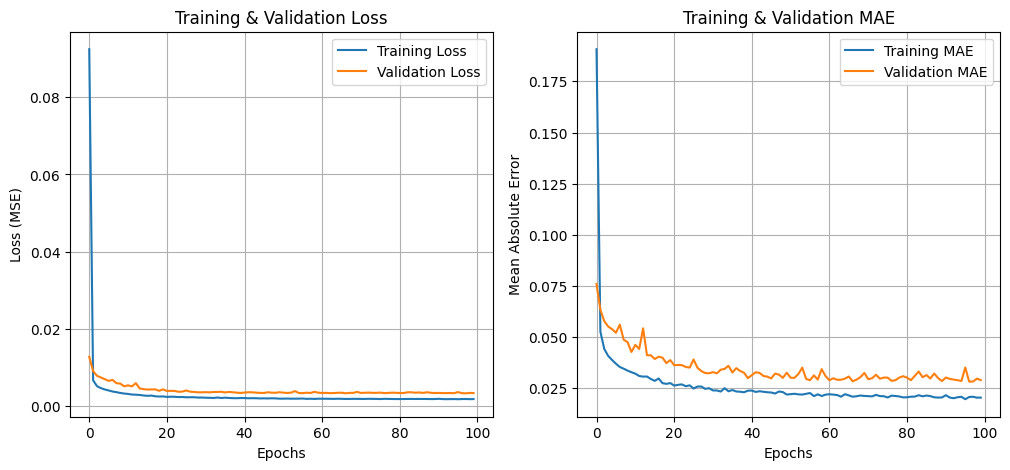

In [10]:
import matplotlib.pyplot as plt

# Plot loss & MAE over epochs
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label="Training MAE")
plt.plot(history.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training & Validation MAE")
plt.legend()
plt.grid()

plt.savefig("plot_loss_&_MAE_over_epochs.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [13]:
# Pick one random sample from X_test
random_sample = X_test[0]  # Shape: (5, 8)

plt.figure(figsize=(10, 6))
sns.heatmap(random_sample, cmap="coolwarm", annot=True, fmt=".1f", xticklabels=weather_features, yticklabels=[f"Day-{i+1}" for i in range(5)])
plt.title("Input Data: 5 Days x 8 Features")
plt.xlabel("Weather Features")
plt.ylabel("Past 5 Days")
plt.show()


NameError: name 'weather_features' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Display one test sample (8 features for the 6th day)
sample_index = 0  # Change to see different samples
feature_names = ["TempMax", "TempMin", "Humidity", "Precip", "WindSpeed", "WindGust", "Pressure", "CloudCover"]

df_compare = pd.DataFrame({
    "Feature": feature_names,
    "Actual": y_test_actual[sample_index],
    "Predicted": predictions[sample_index]
})

print(df_compare)


In [ ]:
model.save("weather_prediction_lstm.h5")

## MLP with LSTM Predicted Weather

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Dataset

In [12]:
df = pd.read_csv('D:\IIT_Work\merged_complete_data.csv')
df.head(10) 

,day_5_flood_status,day_6_flood_status,Elevation_MinMax,flood_top,elevation_top,flood_bottom,elevation_bottom,flood_left,elevation_left,flood_right,...,sealevelpressure_day4,cloudcover_day4,tempmax_day5,tempmin_day5,humidity_day5,precip_day5,windspeed_day5,windgust_day5,sealevelpressure_day5,cloudcover_day5
0,0,0,0.043172,0,0.0,0,0.041295,0,0.000000,1,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
1,1,0,0.040357,0,0.0,1,0.042234,0,0.043172,1,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
2,1,1,0.041295,0,0.0,1,0.044111,1,0.040357,1,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
3,1,1,0.041295,0,0.0,1,0.042234,1,0.041295,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
4,0,0,0.043641,0,0.0,0,0.041764,1,0.041295,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
5,0,0,0.045988,0,0.0,1,0.038480,0,0.043641,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
6,0,0,0.043641,0,0.0,0,0.042234,0,0.045988,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
7,0,0,0.038010,0,0.0,0,0.036603,0,0.043641,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
8,0,0,0.041764,0,0.0,0,0.041764,0,0.038010,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2
9,0,0,0.039887,0,0.0,0,0.045049,0,0.041764,0,...,1002.2,65.4,34.8,27.2,72.6,13.0,7.6,13.7,1002.3,82.2


### Data Cleaning

In [13]:
# Convert to DataFrame
df_full = df

# Separate 0 -> 0 cases and sample 1000 from them
df_0_0 = df_full[(df_full["day_5_flood_status"] == 0) & (df_full["day_6_flood_status"] == 0)].sample(n=1000, random_state=42)

# Keep all other cases
df_other = df_full[(df_full["day_5_flood_status"] != 0) | (df_full["day_6_flood_status"] != 0)]

# Combine the sampled 0->0 cases with the rest
df_balanced = pd.concat([df_0_0, df_other], ignore_index=True)

# Count unique transitions after undersampling
transition_counts_balanced = df_balanced.groupby(["day_5_flood_status", "day_6_flood_status"]).size().unstack(fill_value=0)

# Extract counts
count_0_0_balanced = transition_counts_balanced.loc[0, 0] if 0 in transition_counts_balanced.index and 0 in transition_counts_balanced.columns else 0
count_0_1_balanced = transition_counts_balanced.loc[0, 1] if 0 in transition_counts_balanced.index and 1 in transition_counts_balanced.columns else 0
count_1_1_balanced = transition_counts_balanced.loc[1, 1] if 1 in transition_counts_balanced.index and 1 in transition_counts_balanced.columns else 0
count_1_0_balanced = transition_counts_balanced.loc[1, 0] if 1 in transition_counts_balanced.index and 0 in transition_counts_balanced.columns else 0

# Total count after balancing
total_cells_balanced = len(df_balanced)

# Compute percentages
percent_0_0_balanced = (count_0_0_balanced / total_cells_balanced) * 100
percent_0_1_balanced = (count_0_1_balanced / total_cells_balanced) * 100
percent_1_1_balanced = (count_1_1_balanced / total_cells_balanced) * 100
percent_1_0_balanced = (count_1_0_balanced / total_cells_balanced) * 100

# Flood increase and decrease rates
flood_increase_rate_balanced = count_0_1_balanced / total_cells_balanced
flood_decrease_rate_balanced = count_1_0_balanced / total_cells_balanced

# Results after undersampling
{
    "0 -> 0": count_0_0_balanced,
    "0 -> 1": count_0_1_balanced,
    "1 -> 1": count_1_1_balanced,
    "1 -> 0": count_1_0_balanced,
    "Total Cells": total_cells_balanced,
    "Percentage 0 -> 0": percent_0_0_balanced,
    "Percentage 0 -> 1": percent_0_1_balanced,
    "Percentage 1 -> 1": percent_1_1_balanced,
    "Percentage 1 -> 0": percent_1_0_balanced,
    "Flood Increase Rate": flood_increase_rate_balanced,
    "Flood Decrease Rate": flood_decrease_rate_balanced
}

{'0 -> 0': 1000,
 '0 -> 1': 801,
 '1 -> 1': 1550,
 '1 -> 0': 706,
 'Total Cells': 4057,
 'Percentage 0 -> 0': 24.648755237860488,
 'Percentage 0 -> 1': 19.743652945526254,
 'Percentage 1 -> 1': 38.20557061868375,
 'Percentage 1 -> 0': 17.402021197929503,
 'Flood Increase Rate': 0.19743652945526252,
 'Flood Decrease Rate': 0.17402021197929504}

In [14]:
df = df_balanced

### Weather Prediction

In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras import losses

# Load the trained LSTM model
model = load_model("D:\IIT_Work\weather_prediction_lstm.h5", custom_objects={'mse': losses.MeanSquaredError()})

def process_batch(batch_df):
    """
    Process a batch of data to predict the 6th day's weather.
    """
    # Extract 5 days of weather data
    weather_features = ['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'windgust', 'sealevelpressure', 'cloudcover']
    weather_data = np.stack([
        batch_df[[f"{feat}_day{i}" for feat in weather_features]].values for i in range(1, 6)
    ], axis=1)  # Shape: (batch_size, 5, 8)

    # Predict 6th-day weather
    predicted_weather = model.predict(weather_data, batch_size=256)  # Optimize batch size

    # Combine necessary columns with predicted weather
    relevant_features = [
        'day_5_flood_status', 'flood_top', 'elevation_top', 'flood_bottom', 'elevation_bottom',
        'flood_left', 'elevation_left', 'flood_right', 'elevation_right', 'flood_top_left',
        'elevation_top_left', 'flood_top_right', 'elevation_top_right', 'flood_bottom_left',
        'elevation_bottom_left', 'flood_bottom_right', 'elevation_bottom_right', 'Elevation_MinMax',
        'tempmax_day5', 'tempmin_day5', 'humidity_day5', 'precip_day5', 'windspeed_day5',
        'windgust_day5', 'sealevelpressure_day5', 'cloudcover_day5'
    ]
    
    batch_result = np.hstack([batch_df[relevant_features].values, predicted_weather, batch_df[['day_6_flood_status']].values])
    return batch_result

def generate_flood_prediction_dataset(df, batch_size=1024):
    """
    Generate the dataset with predicted weather for the 6th day.
    Processes data in batches for efficiency.
    """
    num_samples = len(df)
    new_data = []

    # Process in batches to reduce memory load
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch_df = df.iloc[start:end]
        batch_result = process_batch(batch_df)
        new_data.append(batch_result)

    # Convert list of arrays to a single NumPy array
    new_data = np.vstack(new_data)

    # Define column names
    columns = [
        'day_5_flood_status', 'flood_top', 'elevation_top', 'flood_bottom', 'elevation_bottom',
        'flood_left', 'elevation_left', 'flood_right', 'elevation_right', 'flood_top_left',
        'elevation_top_left', 'flood_top_right', 'elevation_top_right', 'flood_bottom_left',
        'elevation_bottom_left', 'flood_bottom_right', 'elevation_bottom_right', 'Elevation_MinMax',
        'tempmax_day5', 'tempmin_day5', 'humidity_day5', 'precip_day5', 'windspeed_day5',
        'windgust_day5', 'sealevelpressure_day5', 'cloudcover_day5',
        'tempmax_day6_pred', 'tempmin_day6_pred', 'humidity_day6_pred', 'precip_day6_pred',
        'windspeed_day6_pred', 'windgust_day6_pred', 'sealevelpressure_day6_pred', 'cloudcover_day6_pred',
        'day_6_flood_status'
    ]

    return pd.DataFrame(new_data, columns=columns)

# Load dataset
# df = pd.read_csv("your_dataset.csv")

# Generate optimized dataset
new_dataset = generate_flood_prediction_dataset(df)

# Save the dataset
new_dataset.to_csv("flood_prediction_dataset.csv", index=False)
print("Optimized dataset generated and saved successfully!")
df = new_dataset

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Optimized dataset generated and saved successfully!


### Data Visualization

<Figure size 800x500 with 0 Axes>

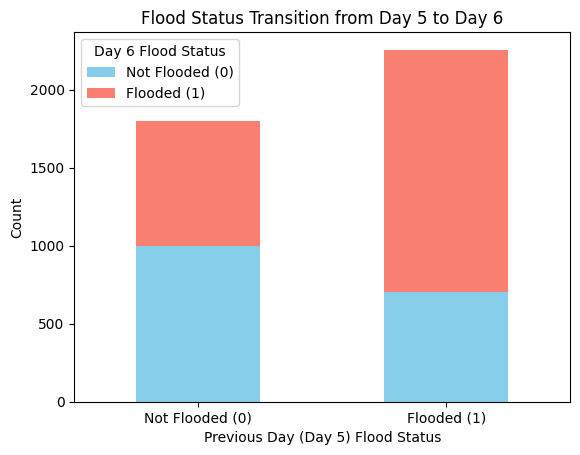

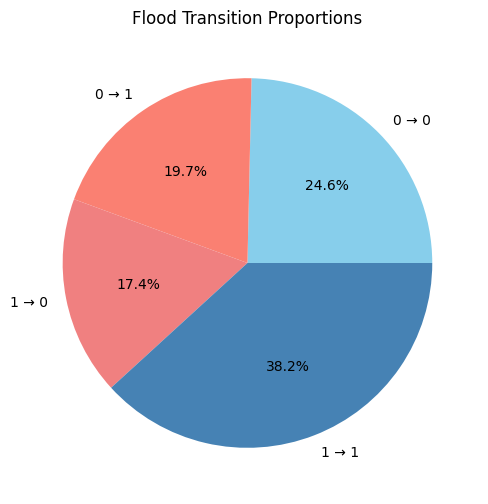

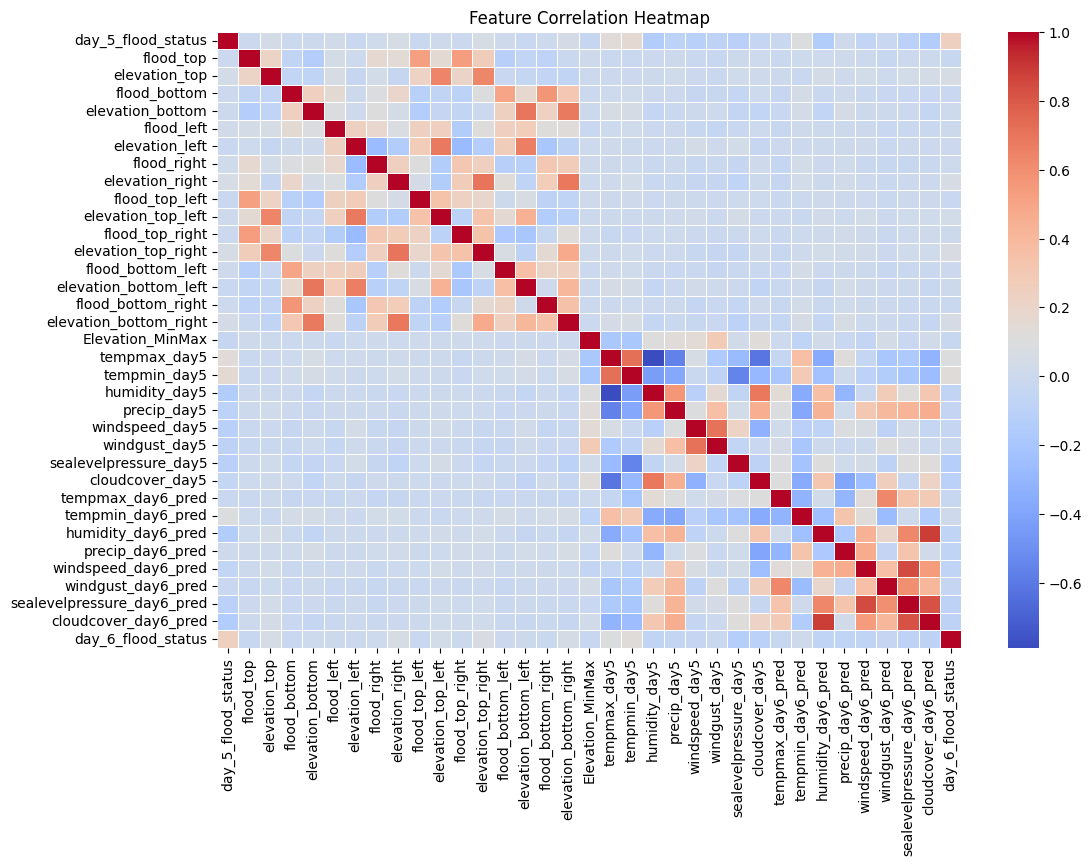

C:\Users\Harshit-PC\AppData\Local\Temp\ipykernel_16004\3640937738.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["day_6_flood_status"], y=df[feature], palette=['skyblue', 'salmon'])
C:\Users\Harshit-PC\AppData\Local\Temp\ipykernel_16004\3640937738.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["day_6_flood_status"], y=df[feature], palette=['skyblue', 'salmon'])
C:\Users\Harshit-PC\AppData\Local\Temp\ipykernel_16004\3640937738.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["day_6_flood_status"], y=df[feature],

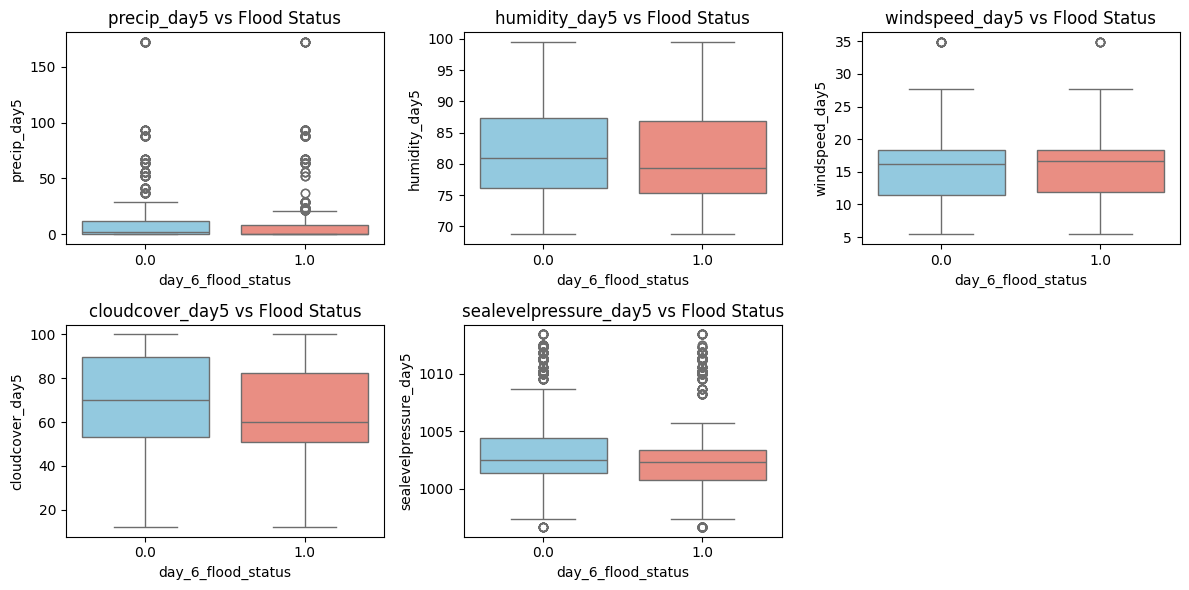

In [16]:
# Flood transition counts
transition_counts = df.groupby(["day_5_flood_status", "day_6_flood_status"]).size().unstack(fill_value=0)

# Bar Chart for Flood Transition
plt.figure(figsize=(8, 5))
transition_counts.plot(kind="bar", stacked=True, color=['skyblue', 'salmon'])
plt.title("Flood Status Transition from Day 5 to Day 6")
plt.xlabel("Previous Day (Day 5) Flood Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Not Flooded (0)', 'Flooded (1)'], rotation=0)
plt.legend(title="Day 6 Flood Status", labels=['Not Flooded (0)', 'Flooded (1)'])

plt.savefig("flood_transition_proportion.pdf", format="pdf", bbox_inches="tight")
plt.show()



# Pie Chart for Flood Transitions
plt.figure(figsize=(6, 6))
transition_labels = ["0 → 0", "0 → 1", "1 → 0", "1 → 1"]
transition_values = [transition_counts.loc[0, 0], transition_counts.loc[0, 1],
                     transition_counts.loc[1, 0], transition_counts.loc[1, 1]]

plt.pie(transition_values, labels=transition_labels, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightcoral', 'steelblue'])
plt.title("Flood Transition Proportions")
plt.savefig("pie_chart_for_flood_transition.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Heatmap of Feature Correlation with Flooding
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Box Plot for Weather Features affecting Flooding
weather_features = ["precip_day5", "humidity_day5", "windspeed_day5", "cloudcover_day5", "sealevelpressure_day5"]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(weather_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["day_6_flood_status"], y=df[feature], palette=['skyblue', 'salmon'])
    plt.title(f"{feature} vs Flood Status")
plt.tight_layout()
plt.show()


In [17]:
df.shape

(4057, 35)

### Data Splitting

In [18]:
# Separate features and target
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MLP model training

In [14]:
# Separate features and target
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1)

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/150


D:\IIT_Work\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5546 - loss: 0.7956 - val_accuracy: 0.6256 - val_loss: 0.6559
Epoch 2/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5966 - loss: 0.6903 - val_accuracy: 0.6515 - val_loss: 0.6382
Epoch 3/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 0.6436 - val_accuracy: 0.6576 - val_loss: 0.6247
Epoch 4/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.6212 - val_accuracy: 0.6663 - val_loss: 0.6154
Epoch 5/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - loss: 0.6228 - val_accuracy: 0.6613 - val_loss: 0.6055
Epoch 6/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - loss: 0.5952 - val_accuracy: 0.6687 - val_loss: 0.5944
Epoch 7/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.5940 - val_accuracy: 0.6897 - val_loss: 0.5831
Epoch 8/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.5952 - val_accuracy: 0.6909

## Multi Modal Approach

Epoch 1/150


D:\IIT_Work\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5170 - loss: 0.7375 - val_accuracy: 0.5751 - val_loss: 0.6708
Epoch 2/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6006 - loss: 0.6701 - val_accuracy: 0.6096 - val_loss: 0.6502
Epoch 3/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 0.6441 - val_accuracy: 0.6367 - val_loss: 0.6367
Epoch 4/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6307 - val_accuracy: 0.6441 - val_loss: 0.6292
Epoch 5/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - loss: 0.6191 - val_accuracy: 0.6453 - val_loss: 0.6185
Epoch 6/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.6163 - val_accuracy: 0.6687 - val_loss: 0.6100
Epoch 7/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.5905 - val_accuracy: 0.6675 - val_loss: 0.5987
Epoch 8/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - loss: 0.5849 - val_accuracy: 0.6810

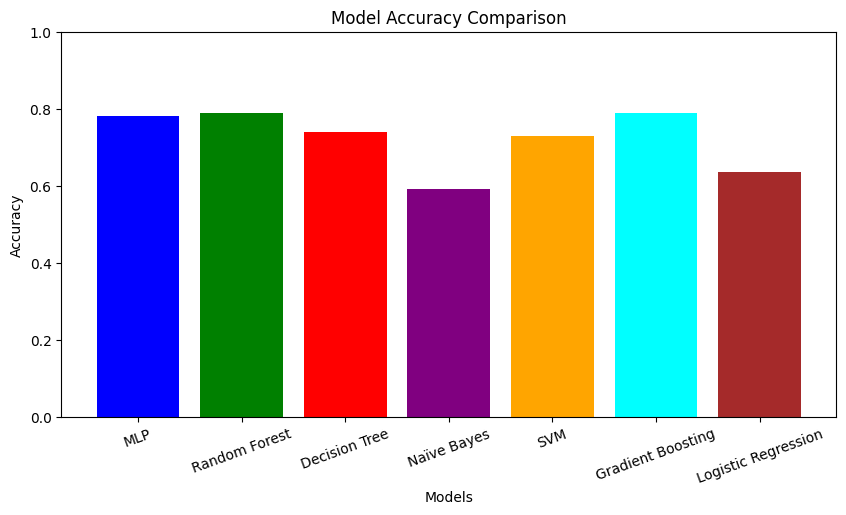

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Separate features and target
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for models that require scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store model names and accuracy scores
model_accuracies = {}

### 1. MLP Model (Neural Network)
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, verbose=1)

y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
model_accuracies["MLP"] = mlp_accuracy

### 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_accuracies["Random Forest"] = accuracy_score(y_test, y_pred_rf)

### 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
model_accuracies["Decision Tree"] = accuracy_score(y_test, y_pred_dt)

### 4. Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
model_accuracies["Naïve Bayes"] = accuracy_score(y_test, y_pred_nb)

### 5. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_accuracies["SVM"] = accuracy_score(y_test, y_pred_svm)

### 6. Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
model_accuracies["Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)

### 7. Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)

# Print accuracies
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# Plot comparison chart
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


Epoch 1/200


D:\IIT_Work\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5527 - loss: 0.7312 - val_accuracy: 0.6392 - val_loss: 0.6389
Epoch 2/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6356 - loss: 0.6438 - val_accuracy: 0.6663 - val_loss: 0.6152
Epoch 3/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.6210 - val_accuracy: 0.6638 - val_loss: 0.6061
Epoch 4/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.6061 - val_accuracy: 0.6810 - val_loss: 0.5858
Epoch 5/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.5886 - val_accuracy: 0.7007 - val_loss: 0.5754
Epoch 6/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 0.5758 - val_accuracy: 0.7155 - val_loss: 0.5556
Epoch 7/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.5616 - val_accuracy: 0.7143 - val_loss: 0.5527
Epoch 8/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.5623 - val_accuracy: 0.7217

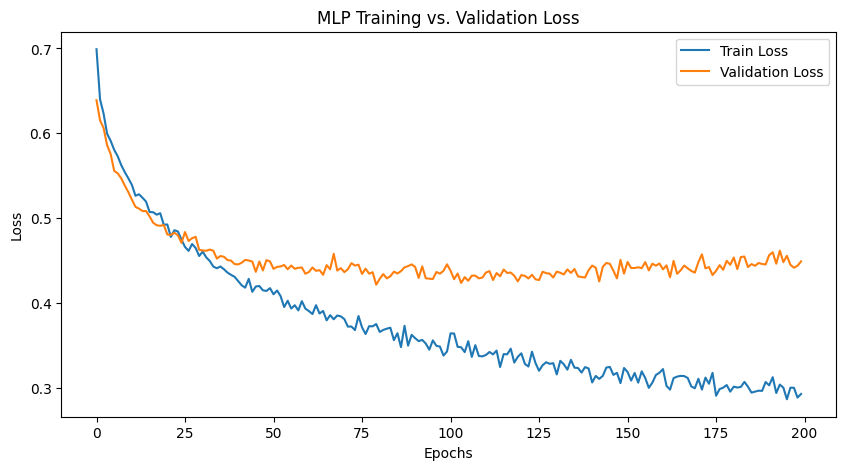

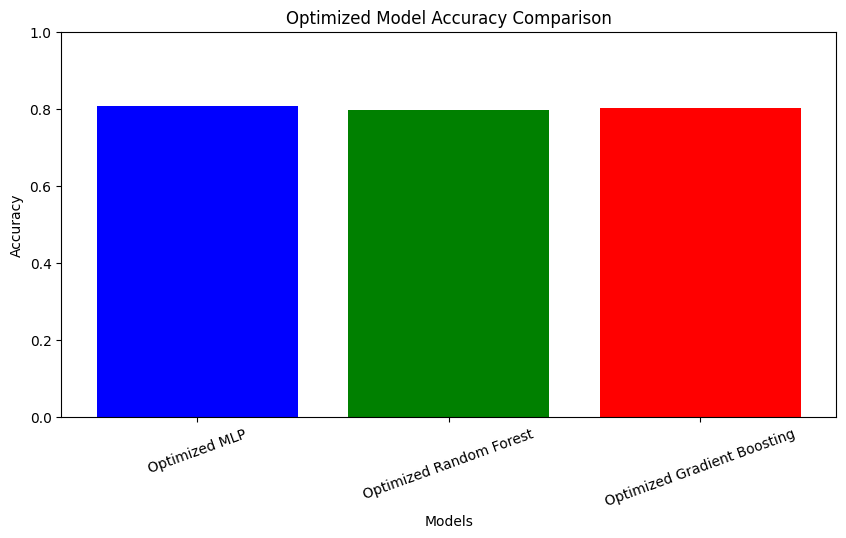

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Separate features and target
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store accuracy results
model_accuracies = {}

### 1. **Optimized MLP Model**
def create_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Increased neurons
        Dropout(0.4),  # Higher dropout to prevent overfitting
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])  # Tuned learning rate
    return model

mlp_model = create_mlp()
history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=16, verbose=1)  # Smaller batch size

y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
model_accuracies["Optimized MLP"] = mlp_accuracy

### **2. Optimized Random Forest**
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Random Forest"] = accuracy_score(y_test, y_pred_rf)

### **3. Optimized Gradient Boosting**
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)

### **Overfitting Check (Training vs. Test Accuracy)**
print("\nModel Overfitting Check:")
for model, acc in model_accuracies.items():
    train_acc = rf_model.best_estimator_.score(X_train, y_train) if "Random Forest" in model else \
                gb_model.best_estimator_.score(X_train, y_train) if "Gradient Boosting" in model else \
                mlp_model.evaluate(X_train, y_train, verbose=0)[1]
    print(f"{model} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {acc:.4f}")

# **4. Plot Training vs. Validation Loss for MLP**
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("MLP Training vs. Validation Loss")
plt.show()

# **5. Bar Chart: Optimized Models Comparison**
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Optimized Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


Epoch 1/150


D:\IIT_Work\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5583 - loss: 1.9710 - val_accuracy: 0.6096 - val_loss: 1.6591
Epoch 2/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6058 - loss: 1.5946 - val_accuracy: 0.6318 - val_loss: 1.3869
Epoch 3/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 1.3373 - val_accuracy: 0.6453 - val_loss: 1.1902
Epoch 4/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6444 - loss: 1.1489 - val_accuracy: 0.6305 - val_loss: 1.0496
Epoch 5/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 1.0124 - val_accuracy: 0.6601 - val_loss: 0.9414
Epoch 6/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.9150 - val_accuracy: 0.6613 - val_loss: 0.8651
Epoch 7/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 0.8436 - val_accuracy: 0.6798 - val_loss: 0.8063
Epoch 8/150
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.7852 - val_accuracy: 0.6712

D:\IIT_Work\env\lib\site-packages\xgboost\core.py:158: UserWarning: [10:27:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Model Overfitting Check:
Optimized MLP - Train Accuracy: 0.8197, Test Accuracy: 0.7685
Optimized Random Forest - Train Accuracy: 0.8968, Test Accuracy: 0.8128
Optimized Gradient Boosting - Train Accuracy: 0.8558, Test Accuracy: 0.8054
Optimized XGBoost - Train Accuracy: 0.9479, Test Accuracy: 0.8005
Decision Tree - Train Accuracy: 0.9008, Test Accuracy: 0.7635
Naïve Bayes - Train Accuracy: 0.6173, Test Accuracy: 0.5911
SVM - Train Accuracy: 0.7843, Test Accuracy: 0.7303
Logistic Regression - Train Accuracy: 0.6730, Test Accuracy: 0.6367


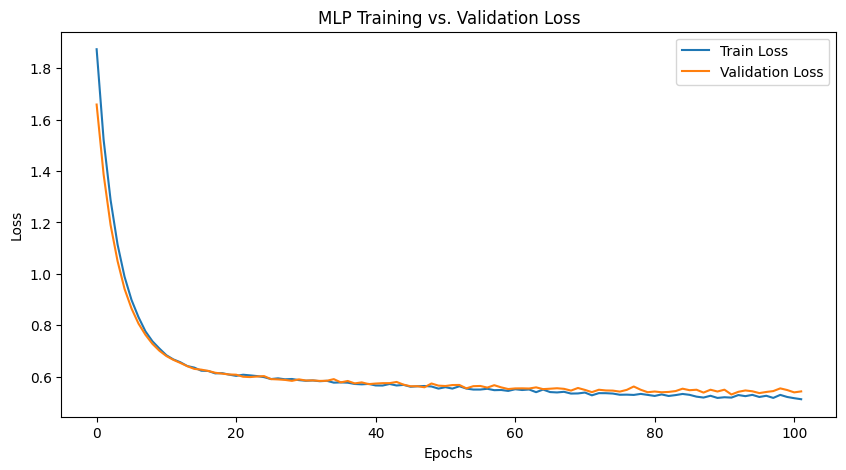

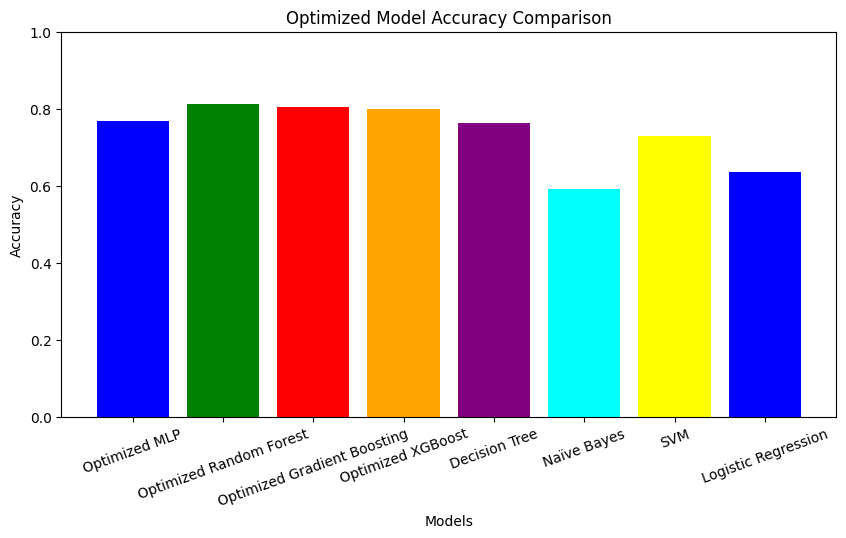

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb

# Load dataset
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store accuracy results
model_accuracies = {}

### 🔷 **1. Optimized MLP Model (Neural Network)**
def create_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),  # L2 Regularization
        Dropout(0.4),  # Higher dropout to reduce overfitting
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])  # Reduced LR
    return model

mlp_model = create_mlp()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                        epochs=150, batch_size=32, verbose=1, callbacks=[early_stop])

y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
model_accuracies["Optimized MLP"] = mlp_accuracy

### 🔷 **2. Optimized Random Forest**
rf_params = {'n_estimators': [200], 'max_depth': [10], 'min_samples_split': [5]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Random Forest"] = accuracy_score(y_test, y_pred_rf)

### 🔷 **3. Optimized Gradient Boosting**
gb_params = {'n_estimators': [150], 'learning_rate': [0.05], 'max_depth': [4]}
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)

### 🔷 **4. Optimized XGBoost Model**
xgb_params = {
    'n_estimators': [200], 
    'max_depth': [6], 
    'learning_rate': [0.05], 
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
xgb_model = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                         xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized XGBoost"] = accuracy_score(y_test, y_pred_xgb)

### 🔷 **5. Other Models**
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_accuracies[name] = accuracy_score(y_test, y_pred)

### 🔷 **6. Overfitting Check**
print("\n🔍 Model Overfitting Check:")
for model, acc in model_accuracies.items():
    train_acc = (
        rf_model.best_estimator_.score(X_train, y_train) if "Random Forest" in model else
        gb_model.best_estimator_.score(X_train, y_train) if "Gradient Boosting" in model else
        xgb_model.best_estimator_.score(X_train, y_train) if "XGBoost" in model else
        mlp_model.evaluate(X_train, y_train, verbose=0)[1] if "MLP" in model else
        models[model].score(X_train, y_train)
    )
    print(f"{model} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {acc:.4f}")

### 🔷 **7. Plot Training vs. Validation Loss for MLP**
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("MLP Training vs. Validation Loss")
plt.show()

### 🔷 **8. Bar Chart: Model Accuracy Comparison**
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Optimized Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


Epoch 1/200


D:\IIT_Work\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5320 - loss: 0.9290 - val_accuracy: 0.6071 - val_loss: 0.6609
Epoch 2/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5689 - loss: 0.8482 - val_accuracy: 0.6108 - val_loss: 0.6502
Epoch 3/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5994 - loss: 0.7273 - val_accuracy: 0.6268 - val_loss: 0.6337
Epoch 4/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.7396 - val_accuracy: 0.6453 - val_loss: 0.6228
Epoch 5/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5976 - loss: 0.7033 - val_accuracy: 0.6392 - val_loss: 0.6161
Epoch 6/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.6632 - val_accuracy: 0.6527 - val_loss: 0.6105
Epoch 7/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.6530 - val_accuracy: 0.6539 - val_loss: 0.6075
Epoch 8/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6308 - loss: 0.6503 - val_accuracy: 0.6564

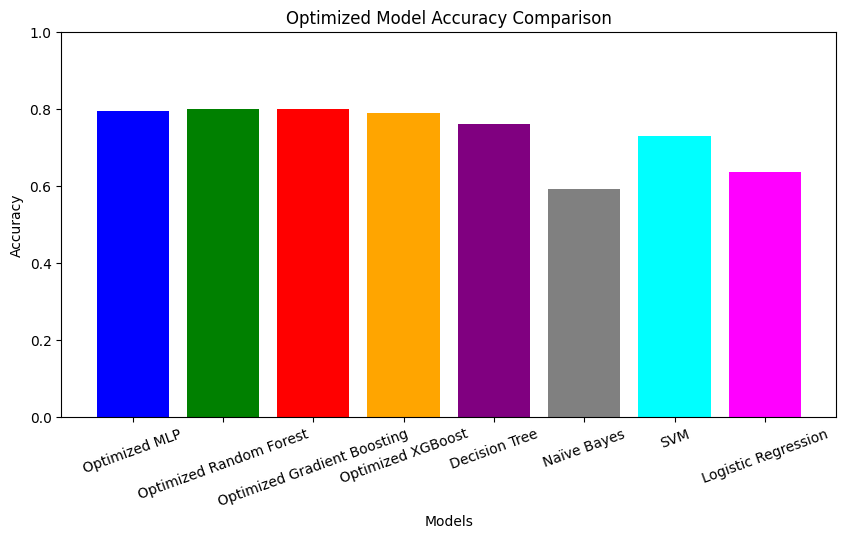

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Separate features and target
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store accuracy results
model_accuracies = {}

### 1️⃣ **Optimized MLP Model**
def create_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_model = create_mlp()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200, batch_size=16, verbose=1,
    callbacks=[early_stopping]
)

y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
model_accuracies["Optimized MLP"] = mlp_accuracy

### 2️⃣ **Optimized Random Forest**
rf_params = {
    'n_estimators': [200],
    'max_depth': [15, 20, None],
    'min_samples_split': [5, 10]
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Random Forest"] = accuracy_score(y_test, y_pred_rf)

### 3️⃣ **Optimized Gradient Boosting**
gb_params = {
    'n_estimators': [150, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)

### 4️⃣ **Optimized XGBoost**
xgb_params = {
    'n_estimators': [150, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'alpha': [0.1],  # L1 regularization
    'lambda': [0.5]  # L2 regularization
}
xgb_model = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized XGBoost"] = accuracy_score(y_test, y_pred_xgb)

### 5️⃣ **Other Models for Comparison**
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_accuracies[model_name] = accuracy_score(y_test, y_pred)

### 🔍 **Overfitting Check**
print("\nModel Overfitting Check:")
for model, acc in model_accuracies.items():
    train_acc = (
        rf_model.best_estimator_.score(X_train, y_train) if "Random Forest" in model else
        gb_model.best_estimator_.score(X_train, y_train) if "Gradient Boosting" in model else
        xgb_model.best_estimator_.score(X_train, y_train) if "XGBoost" in model else
        mlp_model.evaluate(X_train, y_train, verbose=0)[1] if "MLP" in model else
        models[model].score(X_train, y_train)
    )
    print(f"{model} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {acc:.4f}")

### 📊 **Bar Chart: Optimized Models Comparison**
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'orange', 'purple', 'gray', 'cyan', 'magenta'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Optimized Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


### Model Validation

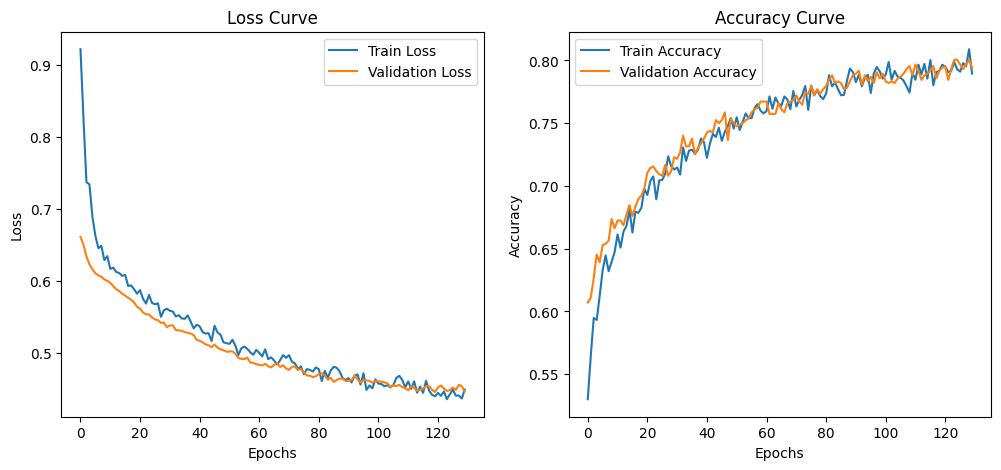

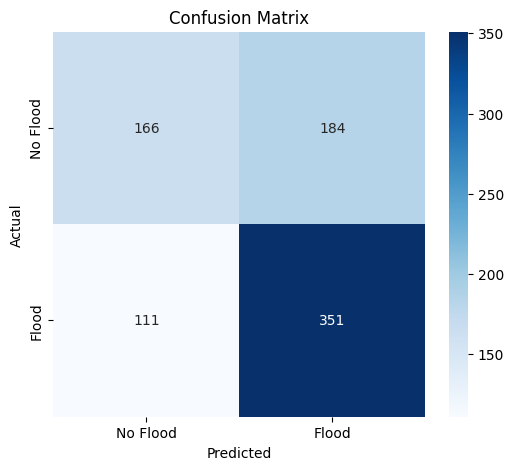

Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.47      0.53       350
         1.0       0.66      0.76      0.70       462

    accuracy                           0.64       812
   macro avg       0.63      0.62      0.62       812
weighted avg       0.63      0.64      0.63       812



AttributeError: 'str' object has no attribute 'predict'

In [13]:
# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Dummy Prediction Example
sample_idx = np.random.randint(0, len(X_test))
sample_input = X_test[sample_idx].reshape(1, -1)  # Reshape for model input
sample_output = model.predict(sample_input)

print("\nDummy Prediction Scenario:")
print(f"Actual Flood Status: {y_test[sample_idx]}")
print(f"Predicted Probability: {sample_output[0][0]:.4f}")
print(f"Predicted Flood Status: {'Flood' if sample_output[0][0] > 0.5 else 'No Flood'}")

### Model Prediction

## play

Epoch 1/300


D:\IIT_Work\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5533 - loss: 0.8918 - val_accuracy: 0.5837 - val_loss: 0.6987 - learning_rate: 0.0010
Epoch 2/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5828 - loss: 0.7548 - val_accuracy: 0.5948 - val_loss: 0.6892 - learning_rate: 0.0010
Epoch 3/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6010 - loss: 0.7301 - val_accuracy: 0.6059 - val_loss: 0.6701 - learning_rate: 0.0010
Epoch 4/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5947 - loss: 0.7146 - val_accuracy: 0.6244 - val_loss: 0.6599 - learning_rate: 0.0010
Epoch 5/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 0.6867 - val_accuracy: 0.6429 - val_loss: 0.6521 - learning_rate: 0.0010
Epoch 6/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6084 - loss: 0.6990 - val_accuracy: 0.6367 - val_loss: 0.6439 - learning_rate: 0.0010
Epoch 7/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 0.6744 - val_a

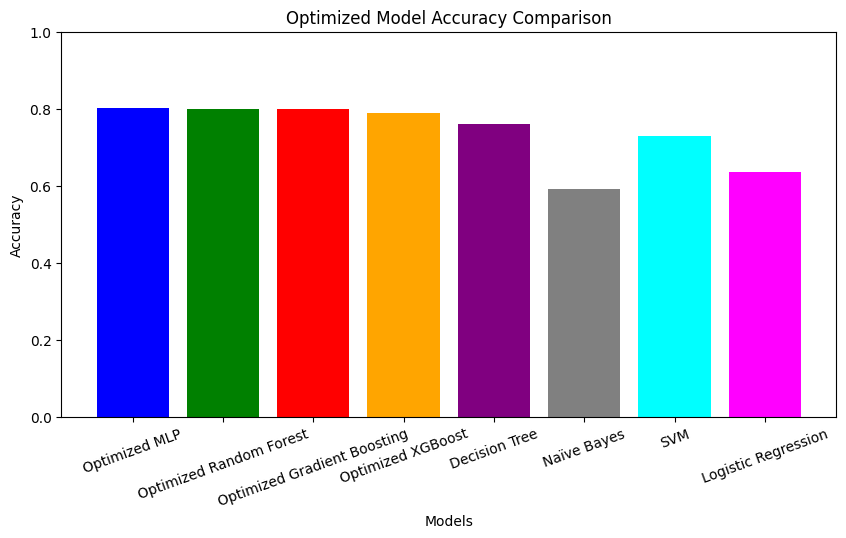

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop(columns=['day_6_flood_status']).values
y = df['day_6_flood_status'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store accuracy results
model_accuracies = {}

# ### 1️⃣ **Optimized MLP Model**
# def create_mlp():
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# mlp_model = create_mlp()
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = mlp_model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=200, batch_size=16, verbose=1,
#     callbacks=[early_stopping]
# )

# y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
# mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
# model_accuracies["Optimized MLP"] = mlp_accuracy

def create_mlp():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(96, activation='relu', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_model = create_mlp()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300, batch_size=32, verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
model_accuracies["Optimized MLP"] = mlp_accuracy

### 2️⃣ **Optimized Random Forest**
rf_params = {
    'n_estimators': [200],
    'max_depth': [15, 20, None],
    'min_samples_split': [5, 10]
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Random Forest"] = accuracy_score(y_test, y_pred_rf)

### 3️⃣ **Optimized Gradient Boosting**
gb_params = {
    'n_estimators': [150, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy', n_jobs=-1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized Gradient Boosting"] = accuracy_score(y_test, y_pred_gb)

### 4️⃣ **Optimized XGBoost**
xgb_params = {
    'n_estimators': [150, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'alpha': [0.1],  # L1 regularization
    'lambda': [0.5]  # L2 regularization
}
xgb_model = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.best_estimator_.predict(X_test)
model_accuracies["Optimized XGBoost"] = accuracy_score(y_test, y_pred_xgb)

### 5️⃣ **Other Models for Comparison**
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_accuracies[model_name] = accuracy_score(y_test, y_pred)

### 🔍 **Overfitting Check**
print("\nModel Overfitting Check:")
for model, acc in model_accuracies.items():
    train_acc = (
        rf_model.best_estimator_.score(X_train, y_train) if "Random Forest" in model else
        gb_model.best_estimator_.score(X_train, y_train) if "Gradient Boosting" in model else
        xgb_model.best_estimator_.score(X_train, y_train) if "XGBoost" in model else
        mlp_model.evaluate(X_train, y_train, verbose=0)[1] if "MLP" in model else
        models[model].score(X_train, y_train)
    )
    print(f"{model} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {acc:.4f}")

### 📊 **Bar Chart: Optimized Models Comparison**
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'orange', 'purple', 'gray', 'cyan', 'magenta'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Optimized Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()


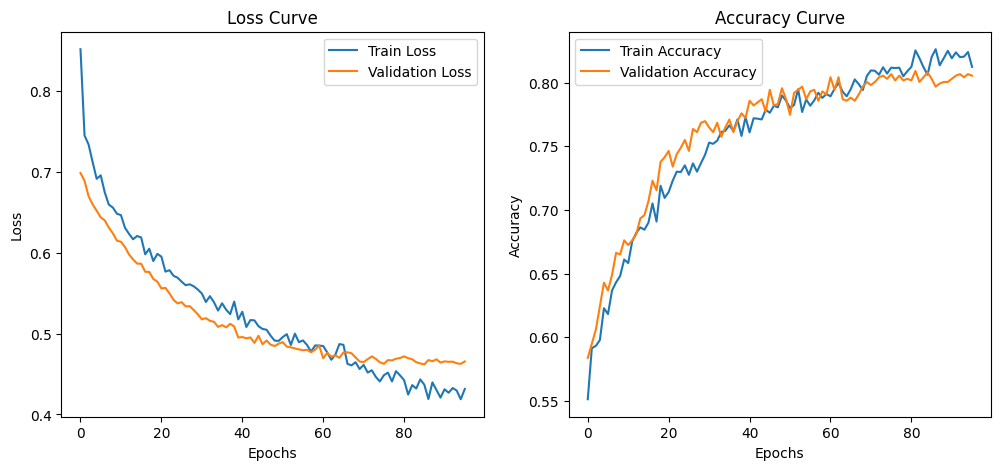

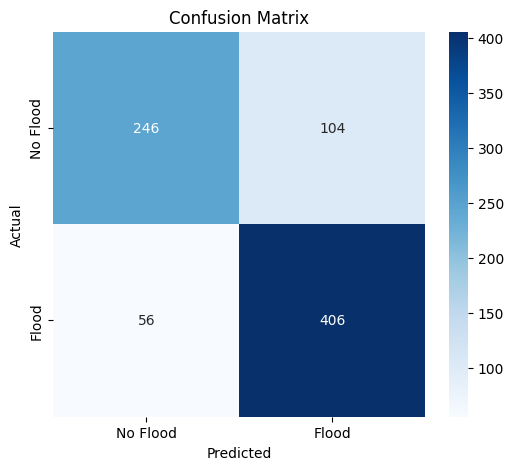

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.70      0.75       350
         1.0       0.80      0.88      0.84       462

    accuracy                           0.80       812
   macro avg       0.81      0.79      0.79       812
weighted avg       0.80      0.80      0.80       812

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Dummy Prediction Scenario:
Actual Flood Status: 0.0
Predicted Probability: 0.2267
Predicted Flood Status: No Flood


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig("plot_final_accuracy_loss_curve.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix_final.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Dummy Prediction Example
sample_idx = np.random.randint(0, len(X_test))
sample_input = X_test[sample_idx].reshape(1, -1)  # Reshape for model input
sample_output = mlp_model.predict(sample_input)

print("\nDummy Prediction Scenario:")
print(f"Actual Flood Status: {y_test[sample_idx]}")
print(f"Predicted Probability: {sample_output[0][0]:.4f}")
print(f"Predicted Flood Status: {'Flood' if sample_output[0][0] > 0.5 else 'No Flood'}")
